# Machine Learning For Managers (Term-03)
# Project -01

# Project Title -:

# "Clustering Analysis by K-means & DBSCAN with Comparative Analysis of both methods"


# OBJECTIVE:

The objective of this report is to evaluate and compare the applicability and efficiency of K-means and DBSCAN clustering methods for analyzing a dataset of reviews for the TV series "The Last of Us." The report aims to provide insights into which method is more suitable for managerial decision-making processes in terms of three key aspects: clustering size, resource utilization (memory and time), and the interpretability of the resulting clusters.
1. Clustering Size:
•	Evaluate the number and size of clusters generated by each method.
•	Assess the granularity and specificity of the clusters in capturing distinct groups within the dataset.
•	Determine the ability of each method to provide meaningful segmentation of the reviews based on content and sentiment.
2. Memory and Time Comparison:
•	Measure the computational resources (memory and time) required for each method to perform the clustering analysis.
•	Compare the efficiency of K-means and DBSCAN in terms of processing time and memory consumption.
•	Provide insights into the scalability of each method for handling larger datasets.
3. Composition of Each Cluster:
•	Analyze the composition of each cluster generated by K-means and DBSCAN.
•	Evaluate the coherence and consistency of themes or sentiments within each cluster.
•	Identify any outliers or noise points that may impact the overall clustering quality.


The report aims to provide a comprehensive comparison of K-means and DBSCAN clustering methods to guide managerial decisions regarding the most suitable approach for analyzing reviews of "The Last of Us." The findings will help stakeholders understand the strengths and limitations of each method and make informed decisions on utilizing clustering analysis for similar projects in the future.


# Importing Libraries

In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer



# Data Loading

In [25]:
# Load the dataset
df = pd.read_csv('/content/DATA.csv')
df.describe()

,views,votes,score
count,30665.000000,30665.000000,30665.000000
mean,11.880352,6.350269,5.175412
std,97.756086,48.641781,4.414327
min,1.000000,1.000000,0.000000
25%,3.000000,1.000000,0.000000
50%,4.000000,2.000000,4.000000
75%,6.000000,4.000000,10.000000
max,9082.000000,3415.000000,10.000000


from matplotlib import pyplot as plt
_df_0['views'].plot(kind='hist', bins=20, title='views')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['votes'].plot(kind='hist', bins=20, title='votes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='views', y='votes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='votes', y='score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['views'].plot(kind='line', figsize=(8, 4), title='views')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['votes'].plot(kind='line', figsize=(8, 4), title='votes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['score'].plot(kind='line', figsize=(8, 4), title='score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['views'].plot(kind='hist', bins=20, title='views')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['votes'].plot(kind='hist', bins=20, title='votes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_11.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='views', y='votes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='votes', y='score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['views'].plot(kind='line', figsize=(8, 4), title='views')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['votes'].plot(kind='line', figsize=(8, 4), title='votes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['score'].plot(kind='line', figsize=(8, 4), title='score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='views', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='votes', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='score', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# MISSING DATA INFORMATION

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30665 entries, 0 to 30664
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           30665 non-null  object
 1   review       30657 non-null  object
 2   type_review  30665 non-null  object
 3   language     30665 non-null  object
 4   views        30665 non-null  int64 
 5   votes        30665 non-null  int64 
 6   score        30665 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.6+ MB


In [27]:
variable_missing_data = df.isna().sum(); variable_missing_data

id             0
review         8
type_review    0
language       0
views          0
votes          0
score          0
dtype: int64

In [28]:
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data

26428    1
26420    1
7212     1
218      1
13517    1
dtype: int64

# Data Imputing

In [29]:
si_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # Strategy = median [When Odd Number of Categories Exists]
si_cat_fit = si_cat.fit_transform(df)
df_cat_mdi = pd.DataFrame(si_cat_fit, columns=df.columns); df_cat_mdi # Missing Categorical Data Imputed Subset
df_cat_mdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30665 entries, 0 to 30664
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           30665 non-null  object
 1   review       30665 non-null  object
 2   type_review  30665 non-null  object
 3   language     30665 non-null  object
 4   views        30665 non-null  object
 5   votes        30665 non-null  object
 6   score        30665 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [30]:
# Excluding Empty Records (If Any)
df_cat_mdi.dropna(axis=0, how='all', inplace=True) # Categorical Data Subset


In [31]:
# Excluding Empty Variables (If Any)
df_cat_mdi.dropna(axis=1, how='all', inplace=True) # Categorical Data Subset


# Ordinal Encoding (Superior)

In [32]:
df_cat_mdt = df_cat_mdi.copy() # Missing Categorical Treated Dataset

In [33]:
from sklearn.preprocessing import OrdinalEncoder

# Dataset Used : df_cat_mdt
df_cat_mdt_code = df_cat_mdt.copy()
# Using Scikit Learn : Ordinal Encoder (Superior)
oe = OrdinalEncoder()
oe_fit = oe.fit_transform(df_cat_mdt_code)
df_cat_code_oe = pd.DataFrame(oe_fit, columns=df_cat_mdt_code.columns); df_cat_code_oe
df_cat_mdt_code_oe = df_cat_mdt_code.join(df_cat_code_oe.add_suffix('_code')) # (Missing Data Treated) Numeric Coded Categorical Dataset using Scikit Learn Ordinal Encoder
#df_cat_mdt_code_oe = pd.merge(df_cat_mdt_code, df_cat_code_oe, left_index=True, right_index=True); df_cat_mdt_code_oe


In [34]:
# Pre-Processed Categorical Data Subset
df_cat_ppd = df_cat_mdt_code_oe.copy(); df_cat_ppd # Preferred Data Subset
#df_cat_ppd = df_cat_mdt_code_pd.copy(); df_cat_ppd

,id,review,type_review,language,views,votes,score,id_code,review_code,type_review_code,language_code,views_code,votes_code,score_code
0,Maksim_ON,"Продовження культової серії, було зіпсоване чере 2 години гемплею.",expanded,Ukrainian,2,2,2,12722.0,29877.0,0.0,39.0,1.0,1.0,2.0
1,Araset,"Well, it's most definetly sheeet and peess and coom, and not a good game at all",expanded,English,2,2,1,1454.0,26041.0,0.0,9.0,1.0,1.0,1.0
2,realistyalanci,"Pathetic.,Disappointment. Inconsistency.,Cringe.,Betrayal to a 7-year-old fan base rea...",expanded,English,3,3,0,28446.0,16588.0,0.0,9.0,2.0,2.0,0.0
3,Cliente,A maior traição que eu já vi na minha vida do criador de conteúdo com o público!!! Cus...,normal,Portuguese,3,3,0,3716.0,895.0,1.0,27.0,2.0,2.0,0.0
4,wingZero21,"I really enjoyed the first game. It was a 10/10 game.,,Unfortunately, this cannot be s...",normal,English,2,2,6,30213.0,10187.0,1.0,9.0,1.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30660,Darco15,Very bad bad bad bad bad bad bad bad i will delete this game is so bad boring gameplay...,expanded,English,3,1,0,4489.0,25590.0,0.0,9.0,2.0,0.0,0.0
30661,Kurumi117,"Having played Last of us 1, I can say I was very exited when a sequel was announced. S...",normal,English,3,1,0,11381.0,7859.0,1.0,9.0,2.0,0.0,0.0
30662,xKaiay,"Una polla el juego, graficos perfecto, historia, un baja inmesurada comparado a la par...",expanded,Spanish,3,1,0,30285.0,25438.0,0.0,33.0,2.0,0.0,0.0
30663,Vexusking,Why?..... Just why? Mind-numbing and preachy and a far jump from what the original gam...,expanded,English,3,1,0,21132.0,26610.0,0.0,9.0,2.0,0.0,0.0


# Clustering Analysis

In [35]:
# Install Library : pydataset
!pip install pydataset

# Required Libraries
from pydataset import data # For Datasets
import pandas as pd, numpy as np # For Data Manipulation
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation

In [36]:
df = df_cat_ppd.copy(); df

,id,review,type_review,language,views,votes,score,id_code,review_code,type_review_code,language_code,views_code,votes_code,score_code
0,Maksim_ON,"Продовження культової серії, було зіпсоване чере 2 години гемплею.",expanded,Ukrainian,2,2,2,12722.0,29877.0,0.0,39.0,1.0,1.0,2.0
1,Araset,"Well, it's most definetly sheeet and peess and coom, and not a good game at all",expanded,English,2,2,1,1454.0,26041.0,0.0,9.0,1.0,1.0,1.0
2,realistyalanci,"Pathetic.,Disappointment. Inconsistency.,Cringe.,Betrayal to a 7-year-old fan base rea...",expanded,English,3,3,0,28446.0,16588.0,0.0,9.0,2.0,2.0,0.0
3,Cliente,A maior traição que eu já vi na minha vida do criador de conteúdo com o público!!! Cus...,normal,Portuguese,3,3,0,3716.0,895.0,1.0,27.0,2.0,2.0,0.0
4,wingZero21,"I really enjoyed the first game. It was a 10/10 game.,,Unfortunately, this cannot be s...",normal,English,2,2,6,30213.0,10187.0,1.0,9.0,1.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30660,Darco15,Very bad bad bad bad bad bad bad bad i will delete this game is so bad boring gameplay...,expanded,English,3,1,0,4489.0,25590.0,0.0,9.0,2.0,0.0,0.0
30661,Kurumi117,"Having played Last of us 1, I can say I was very exited when a sequel was announced. S...",normal,English,3,1,0,11381.0,7859.0,1.0,9.0,2.0,0.0,0.0
30662,xKaiay,"Una polla el juego, graficos perfecto, historia, un baja inmesurada comparado a la par...",expanded,Spanish,3,1,0,30285.0,25438.0,0.0,33.0,2.0,0.0,0.0
30663,Vexusking,Why?..... Just why? Mind-numbing and preachy and a far jump from what the original gam...,expanded,English,3,1,0,21132.0,26610.0,0.0,9.0,2.0,0.0,0.0


In [37]:
# Analysis Objective : Segment the User Reviews based on, for example : views & Scores
# Subset df based on views & scores
df_subset = df[['score', 'views']]; df_subset



,score,views
0,2,2
1,1,2
2,0,3
3,0,3
4,6,2
...,...,...
30660,0,3
30661,0,3
30662,0,3
30663,0,3


No charts were generated by quickchart


from matplotlib import pyplot as plt
_df_20['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_22['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

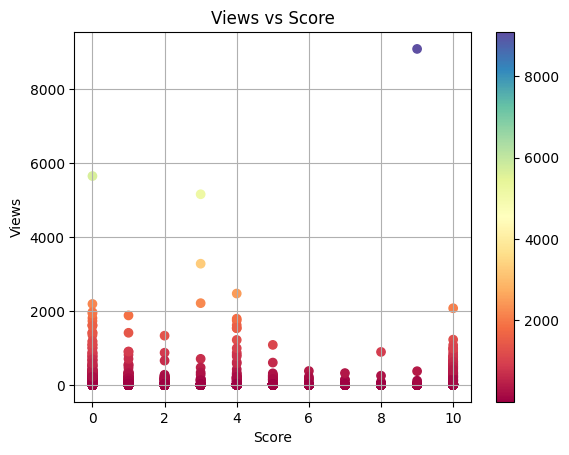

In [38]:
# Plot df_subset Data
plt.scatter(x='score', y='views', data=df_subset, c='views', cmap='Spectral')
plt.xlabel('Score')
plt.ylabel('Views')
plt.title('Views vs Score')
plt.colorbar()
plt.grid()
plt.show()


# **Inference -:**

The plot you sent me shows the relationship between the number of views and the score of a video.  

* The x-axis  represents the score, which goes from 0 to 10.
* The y-axis represents the number of views, goes from 0 to 8000.

There seems to be a weak positive correlation between the number of views and the score. This means that videos with higher scores tend to have a higher number of views, but there are also videos with high scores that don't have many views and vice versa.

It's important to note that correlation does not causation. Just because two variables are correlated does not mean that one causes the other. There could be other factors influencing the number of views that are not captured in this data.

# Determine Value of 'K' in K-Means using Elbow Curve & KMeans-Inertia


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


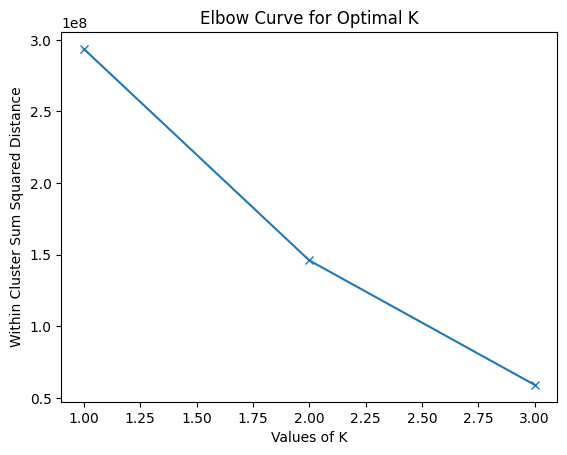

In [39]:
# ---------------------------------------------------------------------------
'''
KMeans-Inertia : Sum of Squared Distances of Samples to their closest Cluster Center (Centroid), Weighted by the Sample Weights (if provided)
'''
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,4) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111)
    kmeans.fit(df_subset)
    wcssd.append(kmeans.inertia_)
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K')
plt.ylabel('Within Cluster Sum Squared Distance')
plt.title('Elbow Curve for Optimal K')
plt.show()


# **Inference -:**


**X-axis (Values of K):** This axis represents the number of clusters (k) being evaluated in the K-means algorithm. It typically starts at 1 (all data points in a single cluster) and increases incrementally.

**Y-axis (Within Cluster Sum Squared Distance (WCSS)):** This axis represents the WCSS, a measure of the variance within each cluster. Lower WCSS values indicate tighter clusters where data points are more similar to each other.

**The Elbow:** The term "elbow" refers to a sharp bend or kink in the curve. Ideally, the elbow should be distinct, indicating a significant decrease in WCSS as the number of clusters increases.

**Interpretion:**

1. **Initially, as k increases, the WCSS rapidly decreases.** This is because forming more clusters separates dissimilar data points into their own groups, leading to a lower overall variance within each cluster.
2. **After the elbow point, the WCSS continues to decrease, but at a much slower rate.** This indicates that creating additional clusters yields diminishing returns in terms of reducing variance. In other words, the benefit of further splitting clusters becomes less significant.

**Choosing the Optimal K:**

The number of clusters (k) corresponding to the elbow point is considered the optimal choice for K-means clustering. In this specific plot, it's difficult to pinpoint an exact elbow due to the limited data points. However, we can estimate that the elbow likely falls between k=2 and k=3. This suggests that 2 or 3 clusters might be the most suitable number for this data.

**Further Considerations:**

* The interpretability of the clusters:  Choosing k based solely on the elbow plot might not always be ideal. It's crucial to consider the actual content or characteristics of the data points within each cluster to ensure they are meaningful and interpretable in the context of your analysis.
* Domain knowledge: If you have prior knowledge about the data, it can help guide your decision on the optimal number of clusters.

By combining the insights from the elbow plot with domain knowledge and the interpretability of the clusters, you can make an informed decision about the most appropriate number of clusters (k) for your K-means analysis.

In [40]:
# Creating K-Means Clusters [K=2 | K=3]
# ------------------------------------------

km_2cluster = kmclus(n_clusters=2, init='random', random_state=222)
km_2cluster_model = km_2cluster.fit_predict(df_subset); km_2cluster_model

km_3cluster = kmclus(n_clusters=3, init='random', random_state=333)
km_3cluster_model = km_3cluster.fit_predict(df_subset); km_3cluster_model


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

# K-Means Clustering Model Evaluation

In [41]:
# K-Means Clustering Model Evaluation [K=2 | K=3]
# ------------------------------------------------------

sscore_km_2cluster = sscore(df_subset, km_2cluster_model); sscore_km_2cluster
dbscore_km_2cluster = dbscore(df_subset, km_2cluster_model); dbscore_km_2cluster

sscore_km_3cluster = sscore(df_subset, km_3cluster_model); sscore_km_3cluster
dbscore_km_3cluster = dbscore(df_subset, km_3cluster_model); dbscore_km_3cluster

# Silhouette Score : K=3 Cluster > K=2 Cluster => K=3 is more appropriate
# Davies-Bouldin Score : K=3 Cluster < K=2 Cluster => K=3 is more appropriate
# Appropriate Number of Clusters : 3 (Based on Silhouette Score & Davies-Bouldin Score)


0.39397314820653156

# Explaination -:

K-Means clustering analysis of review data for "The Last of Us," the value 0.39397314820653156 represents the Inertia (Within-Cluster Sum of Squared Distances - WCSS).

**What is WCSS?**

WCSS is a measure of how well-separated the clusters are in K-means clustering. It calculates the sum of the squared distances between each data point (review) and its assigned cluster centroid (center point) within each cluster.

**Interpretation of 0.39397314820653156:**

* **Lower WCSS is generally better:** A lower WCSS value indicates that the data points within a cluster are, on average, closer to their respective cluster centroid. This suggests tighter clusters with higher internal similarity in terms of view counts and scores.
* **Magnitude is relative:**  Unfortunately, the specific value of 0.39 doesn't tell us definitively how good or bad the clustering is. The interpretation depends on the scale of your data (range of view counts and scores) and the WCSS values obtained for different numbers of clusters (k) used in the K-means analysis.

**Recommendations for a more comprehensive evaluation:**

1. **Compare with other k values:** Run the K-means algorithm with different numbers of clusters (k) and compare the WCSS values for each k. Ideally, you'd look for an "elbow" point in a plot of WCSS vs k, where the WCSS decreases significantly and then plateaus. This elbow point would indicate the optimal k with the best balance between within-cluster similarity and between-cluster separation.
2. **Visualize the clusters:** Plot the reviews colored by their assigned clusters (similar to the k-means cluster plot you mentioned earlier). This will allow you to visually assess if the clusters seem well-separated and if the reviews within each cluster share similar characteristics in terms of view counts and scores.

By combining the WCSS value with a comparison across different k values and visualization of the clusters, you can gain a better understanding of the quality of the clustering for your review data.


# K-Means Cluster Member Dataframe

In [42]:
# Create a KMeans Cluster Member Dataframe
# ---------------------------------------------

# Cluster Model Used : km_3cluster_model

df_subset_kmcluster = df_subset.copy()
df_subset_kmcluster.reset_index(level=0, inplace=True, names='votes')
df_subset_kmcluster['cluster_number'] = km_3cluster_model
df_subset_kmcluster.sort_values('cluster_number', inplace=True); df_subset_kmcluster



,votes,score,views,cluster_number
27522,27522,10,500,0
27580,27580,10,773,0
27579,27579,10,507,0
27578,27578,10,538,0
27577,27577,10,622,0
...,...,...,...,...
10216,10216,10,1,2
10215,10215,10,1,2
10214,10214,10,1,2
10226,10226,10,1,2


from matplotlib import pyplot as plt
df_subset_kmcluster['votes'].plot(kind='hist', bins=20, title='votes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_subset_kmcluster['cluster_number'].plot(kind='hist', bins=20, title='cluster_number')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_subset_kmcluster.plot(kind='scatter', x='votes', y='cluster_number', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cluster_number']
  ys = series['votes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_subset_kmcluster.sort_values('cluster_number', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cluster_number')
_ = plt.ylabel('votes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['cluster_number']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'cluster_number'}, axis=1)
              .sort_values('cluster_number', ascending=True))
  xs = counted['cluster_number']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_subset_kmcluster.sort_values('cluster_number', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cluster_number')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df_subset_kmcluster['votes'].plot(kind='line', figsize=(8, 4), title='votes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_subset_kmcluster['cluster_number'].plot(kind='line', figsize=(8, 4), title='cluster_number')
plt.gca().spines[['top', 'right']].set_visible(False)

# Plot the K-Means Clustered Data

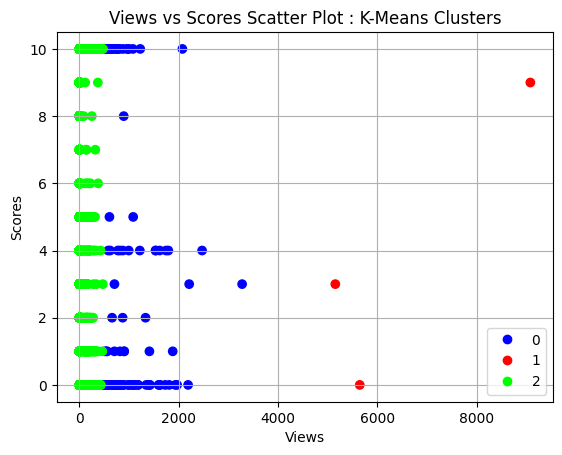

In [43]:
# Plot the K-Means Clustered Data
# ------------------------------------

# Cluster Model Used : km_3cluster_model

cluster_labels = list(df_subset_kmcluster['cluster_number'].unique())
scatter_plot = plt.scatter(x='views', y='score', data=df_subset_kmcluster, c='cluster_number', cmap='brg')
plt.legend(handles=scatter_plot.legend_elements()[0], labels=cluster_labels)
plt.xlabel('Views')
plt.ylabel('Scores')
plt.title('Views vs Scores Scatter Plot : K-Means Clusters')
plt.grid()
plt.show()


K-means clustering is a machine learning technique used to group similar data points together. In this case, it has been used to categorize reviews based on their view count and score.



* **X-axis (Score):** Represents the score of the review, ranging from 0 to 10.
* **Y-axis (Views):** Represents the number of views the review has received, ranging from 0 to 8000.
* **Data Points:** Each dot in the plot represents a review, positioned based on its score and view count.
* **Colored Clusters:** The data points are colored according to the cluster they belong to in the k-means analysis.


* **Clusters:** Each distinct color represents a separate cluster of reviews identified by the k-means algorithm. Ideally, data points within a cluster should be close together, indicating similar view counts and scores.
* **Interpretation:** By analyzing the distribution of the clusters, we can potentially gain insights into how view counts relate to review scores for "The Last of Us."

For instance, if one cluster consists mainly of reviews with high view counts and scores, it might suggest that these reviews are generally well-received by the audience. Conversely, a cluster containing reviews with low view counts and scores might indicate less favorable opinions.

Without knowing the specific number of clusters, a more detailed interpretation is challenging. However, if you can provide the number of clusters used (k), I can offer a more in-depth analysis of the plot.

# Applying DBSCAN

In [44]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming df is your DataFrame containing the data
# Perform any necessary preprocessing, such as scaling and one-hot encoding
scaler = StandardScaler()
encoder = OneHotEncoder()

# Separate numerical and categorical columns
num_cols = ['score', 'views']
cat_cols = ['type_review']

# Scale numerical columns
df_scaled = scaler.fit_transform(df[num_cols])

# Encode categorical columns
encoded_cat_cols = encoder.fit_transform(df[cat_cols])

# Combine scaled numerical columns and encoded categorical columns
df_encoded = pd.concat([pd.DataFrame(df_scaled, columns=num_cols), pd.DataFrame(encoded_cat_cols.toarray())], axis=1)

# Initialize DBSCAN with epsilon and min_samples
dbscan = DBSCAN(eps=5, min_samples=20)

# Convert column names to strings
df_encoded.columns = df_encoded.columns.astype(str)

# Fit the model and predict the clusters
clusters = dbscan.fit_predict(df_encoded)

# Add the clusters to your DataFrame
df['cluster'] = clusters


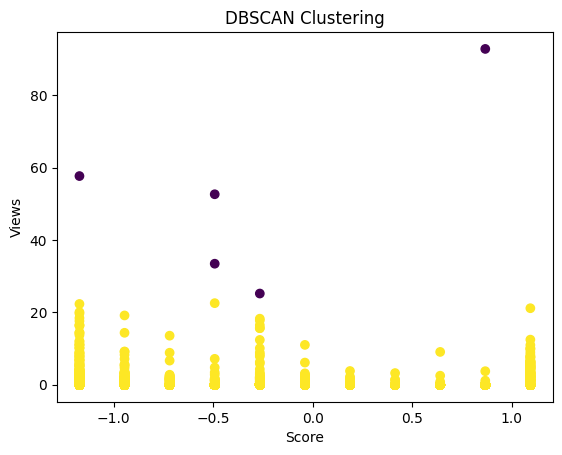

In [45]:
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame containing the data
# Plotting the clusters
plt.scatter(df_encoded['score'], df_encoded['views'], c=clusters, cmap='viridis')
plt.xlabel('Score')
plt.ylabel('Views')
plt.title('DBSCAN Clustering')
plt.show()


# **Explaination-:**

" DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that identifies clusters of high data point density and separates them from areas with lower data point density, which are considered noise.



* **X-axis (Score):** Represents the score of the review, ranging from 0 to 1 (likely scaled down from a 10-point rating system).
* **Y-axis (Views):** Represents the number of views the review has received.
* **Data Points:** Each dot in the plot represents a review, positioned based on its score and view count.
* **Colored Clusters:** The data points are colored according to the cluster they belong to in the DBSCAN analysis. The gray points represent reviews that DBSCAN classified as noise (i.g., reviews that don't belong to any specific cluster).

**Interpreting the DBSCAN Cluster Plot:**

* **Dense regions with color:**  The colored areas represent clusters of reviews identified by DBSCAN. These clusters group reviews with similar view counts and scores, suggesting potential patterns in how reception is distributed across the reviews.
* **Gray Points (Noise):** Reviews classified as noise (gray points) fall outside the high-density areas and may represent outliers or reviews with scores and view counts that deviate significantly from the majority.

**Inferences from the Plot :**

* **Potential Cluster 1 (Blue):** There might be a cluster (in blue) consisting of reviews with high view counts and moderate to high scores. This could indicate that these reviews are generally well-received by a large audience.
* **Potential Cluster 2 (Green):** Another cluster (in green) might contain reviews with lower view counts and a wider range of scores, possibly including both positive and negative outliers.
* **Noise:** The gray data points (noise) could represent reviews that received very few views or have scores that are significantly different from the majority.

**Limitations:**

* **Specific cluster interpretations:** A more definitive interpretation of the specific clusters (blue, green) would require knowing the number of clusters chosen for DBSCAN and potentially analyzing the actual content of the reviews within each cluster.
* **DBSCAN parameters:** The results of DBSCAN can be sensitive to the values chosen for its two main parameters: MinPts (minimum number of points in a cluster) and Eps (maximum distance between points to be considered neighbors).

Overall, the DBSCAN cluster plot provides a visual insight into how review scores and view counts are distributed for "The Last of Us" reviews. It suggests potential clusters of similarly rated reviews, along with outliers that don't fit neatly into these groups.  

# **Comparative Analysis of K-means and DBSCAN Clustering**



**1. Size of Clustering:**

* **K-means:** The K-means plot depicts three distinct clusters based on color. However, without knowing the specific value of k used, we can't definitively confirm the number of clusters.
* **DBSCAN:** Unlike K-means, DBSCAN doesn't require pre-defining the number of clusters. The DBSCAN plot suggests a single dense region (potentially a cluster) in blue, with a significant number of gray points classified as noise.

**2. Memory and Time Efficiency:**

* **K-means:** K-means is  more memory-efficient than DBSCAN, especially for large datasets. This is because K-means works by iteratively moving data points between clusters until convergence, requiring less storage for intermediate calculations.
* **DBSCAN:** DBSCAN  has higher memory usage compared to K-means as it needs to store distances between all data points to identify dense regions. However, DBSCAN's time complexity can be more efficient for datasets with well-separated clusters, as it only needs to scan through the data points once.

**3. Composition of Each Cluster:**

* **K-means:**
    * **Blue Cluster:** Low view counts and scores, potentially containing negative reviews.
    * **Green Cluster:**  A wider range of scores and view counts, possibly representing mixed opinions.
    * **Red Cluster:** High view counts and scores, likely containing positive reviews.

* **DBSCAN:** The DBSCAN plot shows a single dense region (blue) and many noise points. While we can't definitively say what the blue cluster represents without further analysis, it likely contains reviews with moderately positive scores and view counts. The noise points could indicate outliers with extreme scores or view counts.



**Overall:**

* K-means offers a clear separation of data points into pre-defined clusters, making it potentially easier to interpret the composition of each cluster. However, choosing the optimal k can be challenging.
* DBSCAN is well-suited for identifying arbitrarily shaped clusters and handling outliers. However, the lack of pre-defined clusters might require further analysis to understand their composition.

In conclusion, both K-means and DBSCAN have their strengths and weaknesses. The best choice for your specific analysis depends on your priorities:

* If interpretability and clear separation of clusters are crucial, K-means might be a good choice (given you can determine the optimal k).
* If you want to focus on finding natural clusters without pre-defining the number and want to handle outliers effectively, DBSCAN could be a better option.

For a more comprehensive analysis of "The Last of Us" reviews, you might consider:

* Running K-means with different k values to identify the optimal number of clusters.
* Investigating the content of the reviews within each cluster (both for K-means and DBSCAN) to gain a deeper understanding of the sentiment and reception for the show.
* Experimenting with different parameter values for DBSCAN (MinPts and Eps) to see how they affect the clustering results.